In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


In [2]:
df = pd.read_csv('../thesisgenerator/coverage_stats.csv', index_col=0).convert_objects(convert_numeric=True)

In [3]:
df.head()

,1-GRAM_count_total,1-GRAM_count_weighted,AN_count_total,CONJ_count_total,DET_count_total,EMPTY_count_total,J_count_in_labelled,J_count_total,J_count_weighted,NN_count_total,...,V_count_weighted,param_algorithm,param_avg,param_composer,param_dimensionality,param_id,param_reorder,param_rep,param_unlabelled,param_unlabelled_percentage
0,250285,15986200,462555,NaN,NaN,9,61874,61874,1441270,490333,...,940961,random_vect,False,random_vect,NaN,2,False,0,NaN,NaN
1,28215,13715179,245529,NaN,NaN,NaN,3590,4449,1058572,248071,...,758579,count_dependencies,False,Add,100,3,False,0,gigaw,100
2,28215,13715179,245529,NaN,NaN,NaN,3590,4449,1058572,248071,...,758579,count_dependencies,False,Mult,100,4,False,0,gigaw,100
3,28215,13715179,320643,NaN,NaN,1,3590,4449,1211428,337820,...,896349,count_dependencies,False,Left,100,5,False,0,gigaw,100
4,28215,13715179,359188,NaN,NaN,1,3590,4449,1248523,356425,...,795462,count_dependencies,False,Right,100,6,False,0,gigaw,100


In [4]:
ddf = df.query('param_composer=="Add" & param_algorithm=="word2vec" & param_unlabelled=="wiki"')

In [5]:
ddf = ddf.sort('param_unlabelled_percentage')

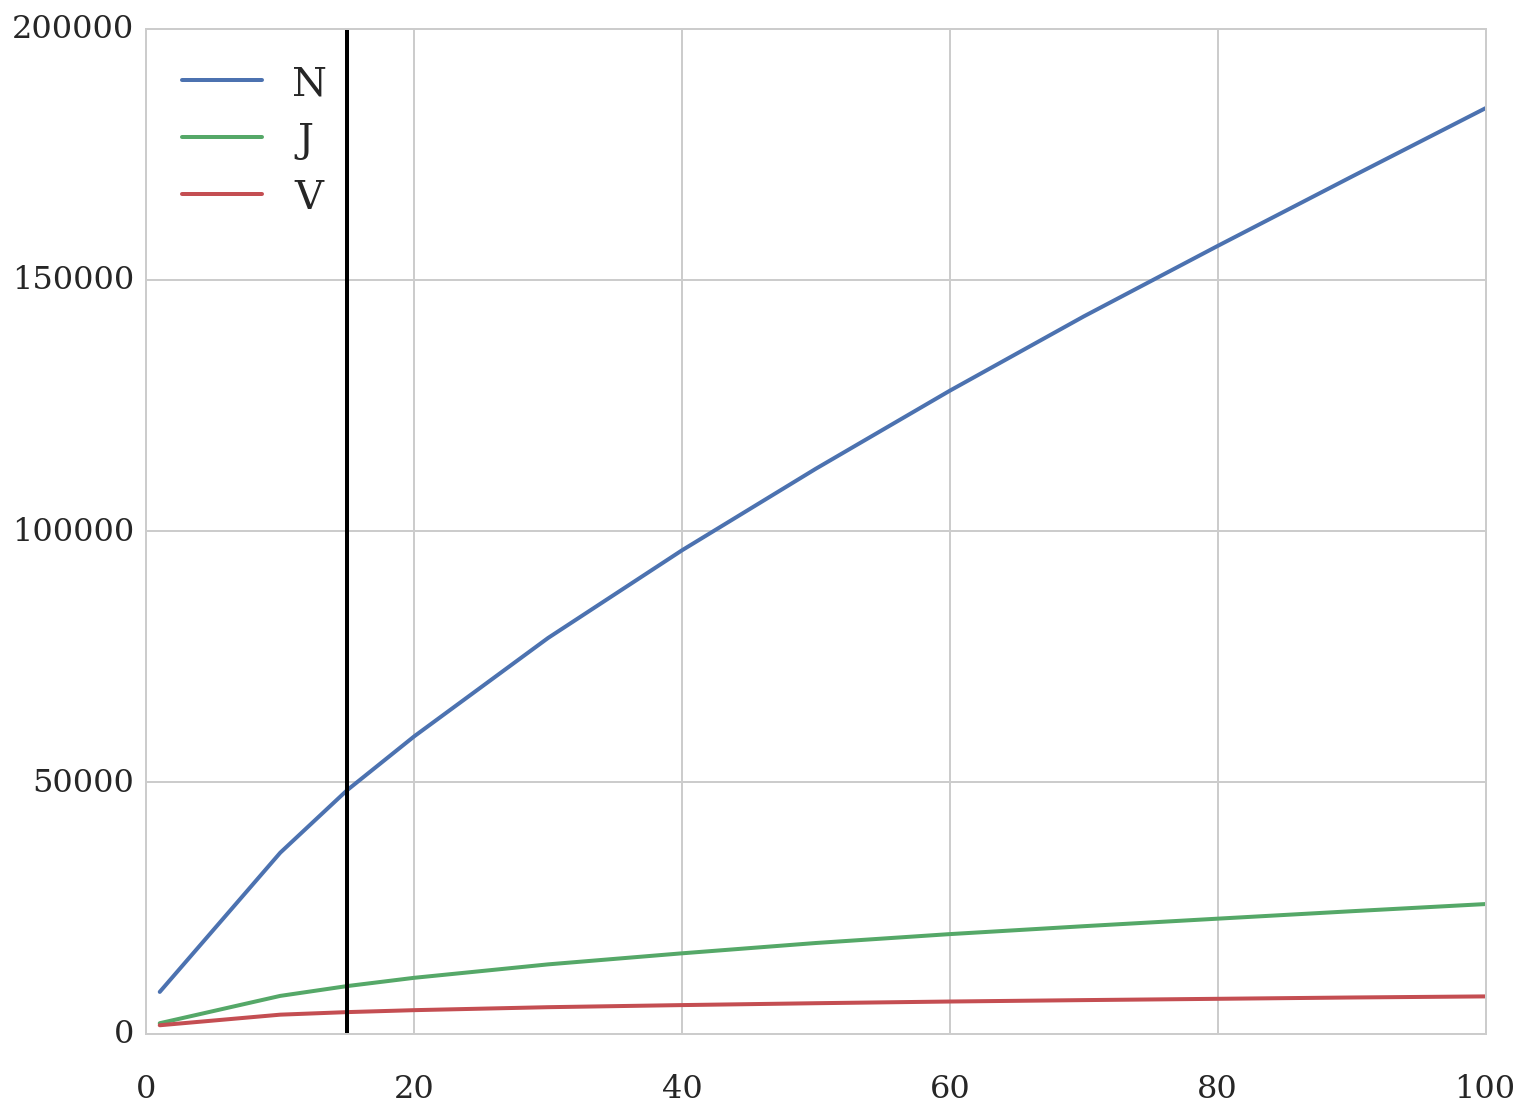

In [6]:
# plt.plot(ddf.param_unlabelled_percentage, ddf.AN_count_total, label='AN')
# plt.plot(ddf.param_unlabelled_percentage, ddf.NN_count_total, label='NN')
plt.plot(ddf.param_unlabelled_percentage, ddf.N_count_total, label='N')
# plt.plot(ddf.param_unlabelled_percentage, ddf.N_count_weighted, label='NW')
# plt.plot(ddf.param_unlabelled_percentage, ddf['1-GRAM_count_weighted'], label='1grW')
# plt.plot(ddf.param_unlabelled_percentage, ddf['1-GRAM_count_total'], label='1gr')
plt.plot(ddf.param_unlabelled_percentage, ddf.J_count_total, label='J')

plt.plot(ddf.param_unlabelled_percentage, ddf.V_count_total, label='V')
# plt.plot(ddf.param_unlabelled_percentage, ddf.V_count_weighted, label='VW')
plt.axvline(15, c='k')
plt.legend(loc='upper left')

In [7]:
cov = ddf['param_unlabelled_percentage N_count_total J_count_total V_count_total AN_count_total NN_count_total'.split()]
cov.columns = 'Percent Nouns Adjs Verbs ANs NNs'.split()
cov = pd.melt(cov, id_vars=['Percent'], value_vars='Nouns Adjs Verbs ANs NNs'.split(), 
              value_name='Types', var_name='PoS')

In [8]:
cov['unit'] = [0]*len(cov)
cov.head()

,Percent,PoS,Types,unit
0,1,Nouns,8298,0
1,10,Nouns,36022,0
2,15,Nouns,48482,0
3,20,Nouns,59185,0
4,30,Nouns,78782,0


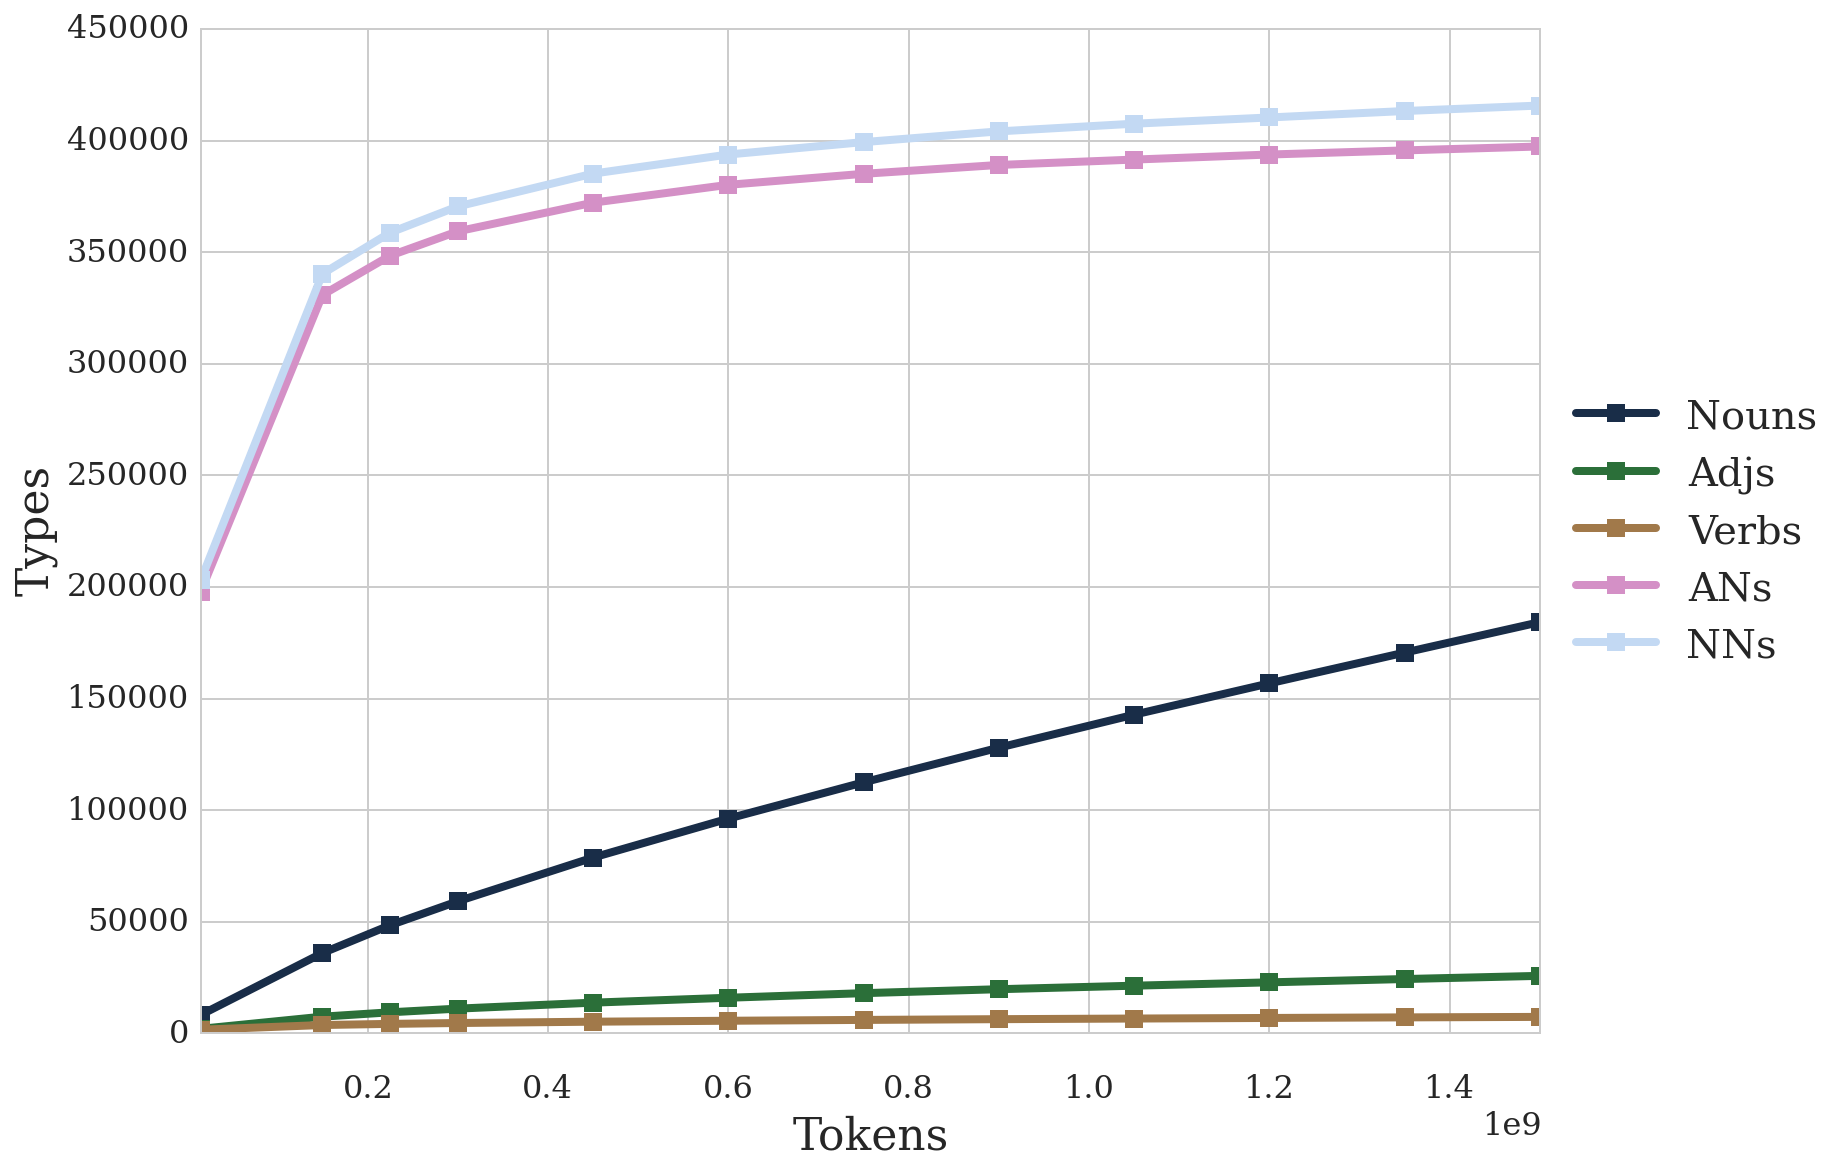

In [9]:
# convert percentages to token counts
def compute_token_count(row):
    corpus_sizes = {'cwiki': 525000000, 'wiki':1500000000}
    return corpus_sizes['wiki'] * (row.Percent / 100)

cov['Tokens'] = cov.apply(compute_token_count, axis=1)

with sns.color_palette("cubehelix", 5):
    sns.tsplot(cov, time='Tokens', condition='PoS', value='Types', unit='unit', marker='s', linewidth=4);
    plt.legend(loc='center left',  bbox_to_anchor=(1, 0.5))

plt.savefig('plot-type-coverage.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)